In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#TRAINING:

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Augmented Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6724 files belonging to 4 classes.


In [7]:
#VALIDATION :

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Augmented Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6724 files belonging to 4 classes.


In [277]:
#training_set - x maza training example ahe ani y maza level ahe
#shape=(32, 128, 128, 3) => 32 means at a time we are feeding 32 images , 128,128 is size of img , 3 is rgb 

In [14]:
for x , y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[254.        240.        253.       ]
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   ...
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   [254.        240.        253.       ]]

  [[254.        240.        253.       ]
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   ...
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   [254.        240.        253.       ]]

  [[254.        240.        253.       ]
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   ...
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   [254.        240.        253.       ]]

  ...

  [[254.        240.        253.       ]
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   ...
   [254.        240.        253.       ]
   [254.        240.        253.       ]
   [2

In [11]:
#Building model

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

In [22]:
cnn = tf.keras.models.Sequential()

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu')) #ikdun padding kadhla karn model slow hoil
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [143]:
#cnn.add(tf.keras.layers.Dropout(0.25))

In [34]:
cnn.add(tf.keras.layers.Flatten())

In [36]:
cnn.add(tf.keras.layers.Dense(units=1024,activation='relu')) #hidden layer

In [149]:
#cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [38]:
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax')) #output

In [153]:
#COMPILING MODEL

In [40]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,814,500 (26.00 MB)

 Trainable params: 6,814,500 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [313]:
#MODEL TRAINING

In [52]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6227 - loss: 2.4419 - val_accuracy: 0.7884 - val_loss: 0.5435
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8187 - loss: 0.4603 - val_accuracy: 0.8815 - val_loss: 0.3506
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.8506 - loss: 0.3924 - val_accuracy: 0.8648 - val_loss: 0.3304
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.8770 - loss: 0.3032 - val_accuracy: 0.8966 - val_loss: 0.3165
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9036 - loss: 0.2599 - val_accuracy: 0.9015 - val_loss: 0.2803
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8949 - loss: 0.2808 - val_accuracy: 0.9267 - val_loss: 0.1951
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9252 - loss: 0.1916 - val_accuracy: 0.9161 - val_loss: 0.2224
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.9328 - loss: 0.1817 - val_accu

In [ ]:
# MODEL EVALUATION

In [53]:
train_loss, train_acc = cnn.evaluate(training_set) #training set accuracy
print('Training accuracy:', train_acc)

211/211 ━━━━━━━━━━━━━━━━━━━━ 78s 371ms/step - accuracy: 0.8943 - loss: 0.3171
Training accuracy: 0.8958953022956848


In [54]:
valid_loss, valid_acc = cnn.evaluate(validation_set) #validation set accuracy
print('Validation accuracy:', valid_acc)

211/211 ━━━━━━━━━━━━━━━━━━━━ 76s 358ms/step - accuracy: 0.8979 - loss: 0.3064
Validation accuracy: 0.8958953022956848


In [ ]:
#saving model

In [74]:
cnn.save('trained_plant_disease_model.keras')

In [76]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6964604258537292,
  0.8306067585945129,
  0.8640689849853516,
  0.8874182105064392,
  0.9006543755531311,
  0.9052647352218628,
  0.9256395101547241,
  0.9318857789039612,
  0.9336704611778259,
  0.9373884797096252],
 'loss': [1.0295801162719727,
  0.42829811573028564,
  0.35802456736564636,
  0.2841540575027466,
  0.2687304615974426,
  0.2575682997703552,
  0.18914668262004852,
  0.1803283393383026,
  0.17269305884838104,
  0.1751718372106552],
 'val_accuracy': [0.7883700132369995,
  0.8814693689346313,
  0.8648126125335693,
  0.8966389298439026,
  0.9015467166900635,
  0.9266805648803711,
  0.9161213636398315,
  0.9437834620475769,
  0.950029730796814,
  0.8958953022956848],
 'val_loss': [0.5435236096382141,
  0.35057732462882996,
  0.3304252624511719,
  0.31647175550460815,
  0.280300498008728,
  0.19508399069309235,
  0.22235232591629028,
  0.15892140567302704,
  0.12019065767526627,
  0.3140602707862854]}

In [ ]:
#recording history in json format

In [78]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
#Accuracy Visualization

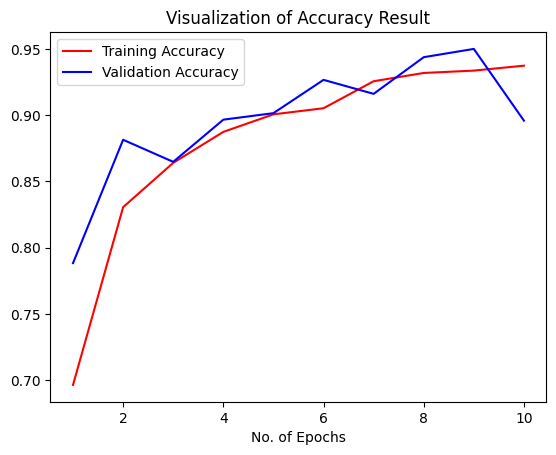

In [80]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
#Some other metrics for model evaluation

In [82]:
class_name = validation_set.class_names
class_name

['Fresh Dragon Fruit', 'Rust Spot', 'Soft Rot Fruit', 'Stem Canker']

In [84]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Augmented Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6724 files belonging to 4 classes.


In [86]:
y_pred = cnn.predict(test_set)

6724/6724 ━━━━━━━━━━━━━━━━━━━━ 79s 12ms/step


In [88]:
y_pred, y_pred.shape

(array([[9.9578708e-01, 3.8090994e-04, 3.8204140e-03, 1.1545929e-05],
        [4.4215874e-05, 9.9995577e-01, 9.0753804e-09, 3.7499479e-09],
        [9.9301070e-01, 5.6296820e-03, 1.3524444e-03, 7.0555047e-06],
        ...,
        [1.1720417e-05, 9.4140875e-01, 5.2388195e-02, 6.1914241e-03],
        [2.9784478e-06, 9.5386672e-01, 4.0532045e-02, 5.5982783e-03],
        [6.0433827e-06, 9.5023060e-01, 4.4513546e-02, 5.2498765e-03]],
       dtype=float32),
 (6724, 4))

In [90]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [92]:
predicted_categories

<tf.Tensor: shape=(6724,), dtype=int64, numpy=array([0, 1, 0, ..., 1, 1, 1])>

In [100]:
true_categories = tf.concat([y for x, y in test_set], axis=0) 

In [101]:
true_categories #gives result in the form of OHE

<tf.Tensor: shape=(6724, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [104]:
Y_true = tf.argmax(true_categories, axis=1)

In [106]:
Y_true

<tf.Tensor: shape=(6724,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [108]:
predicted_categories

<tf.Tensor: shape=(6724,), dtype=int64, numpy=array([0, 1, 0, ..., 1, 1, 1])>

In [110]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 3.7 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 2.7 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [151]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [153]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                    precision    recall  f1-score   support

Fresh Dragon Fruit       0.95      0.87      0.91      2000
         Rust Spot       0.51      0.95      0.66       642
    Soft Rot Fruit       0.99      0.91      0.95      4050
       Stem Canker       0.00      0.00      0.00        32

          accuracy                           0.90      6724
         macro avg       0.61      0.68      0.63      6724
      weighted avg       0.93      0.90      0.91      6724



In [155]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[1738,  253,    9,    0],
       [  16,  613,   13,    0],
       [  65,  312, 3673,    0],
       [   3,   27,    2,    0]])

In [157]:
cm.shape

(4, 4)

In [ ]:
#Confusion Matrix Visualization

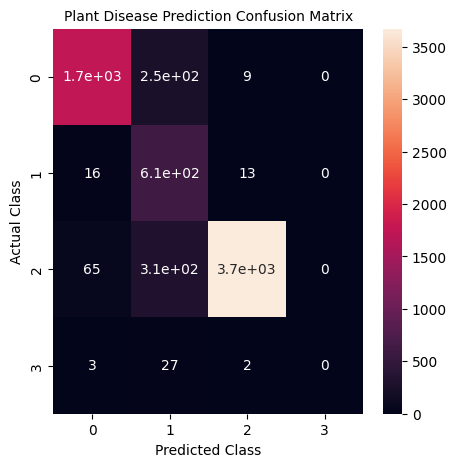

In [163]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 10)
plt.show()